In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

# Сопоставление дескрипторов (Brute-Force Matcher)
# https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

# В примере используется ORB и BFMatcher с нормой Hamming.

img1 = cv.imread('../lab1/test.jpg')
img2 = cv.imread('../lab1/test.jpg')
assert img1 is not None, "Файл не найден."
assert img2 is not None, "Файл не найден."

In [2]:
# 2. Создаём извлекатель признаков ORB
orb = cv.ORB_create()

# 3. Находим ключевые точки и дескрипторы
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

print("Ключевых точек в img1:", len(kp1))
print("Ключевых точек в img2:", len(kp2))

Ключевых точек в img1: 500
Ключевых точек в img2: 500


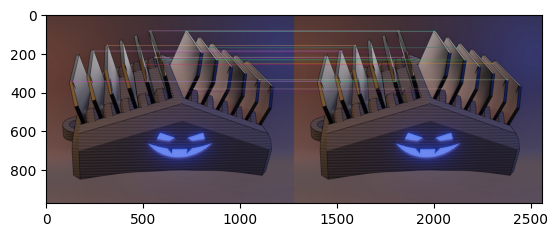

In [3]:
# 4. Создаём Brute-Force matcher с нормой Hamming
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# 5. Выполняем сопоставление дескрипторов
matches = bf.match(des1, des2)

# Сортируем по расстоянию (чем меньше, тем лучше)
matches = sorted(matches, key=lambda x: x.distance)

# 6. Рисуем первые 20 совпадений
img_matches = cv.drawMatches(
    img1, kp1,
    img2, kp2,
    matches[:20],
    None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

plt.imshow(img_matches)